In [1]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import imageio
import seaborn as sns 
import pathlib
from scipy.spatial.kdtree import KDTree
from scipy.spatial.distance import cdist, pdist
sns.set_style('white')

/var/folders/g1/m77h0b_d0fs7ymvpdv3l6n4h0000gr/T/ipykernel_90880/3258997774.py:8: DeprecationWarning: Please use `KDTree` from the `scipy.spatial` namespace, the `scipy.spatial.kdtree` namespace is deprecated.
  from scipy.spatial.kdtree import KDTree


In [2]:
def prepare(df):
    df['duration'] = df.t2-df.t1
    df['time'] = df['z']/24
    return df

In [3]:
fs = sorted(pathlib.Path('data').glob('*.csv'))
imgs = tuple(imageio.imread(pathlib.Path('data/raw/')/f.with_suffix('').name/'image-0001.png') for f in fs)
dfs = tuple(prepare(pd.read_csv(f)) for f in fs)

In [10]:
i = 1
img = imgs[i]
df = dfs[i]
df

id           z           y            x   t1   t2    intens  \
0      1    0.000000  242.000000   778.000000    0    1  0.482913   
1      2    5.400000  465.300000   701.300000    5    7  0.472549   
2      3    5.434783  676.000000   764.521739    5    7  0.561296   
3      4    6.000000  660.000000  1647.250000    6    7  0.372549   
4      5    8.333333   79.500000   840.666667    8   10  0.376471   
..   ...         ...         ...          ...  ...  ...       ...   
535  536  759.000000  182.882353  1368.470588  759  760  0.518800   
536  537  760.000000  444.666667   978.250000  760  761  0.488562   
537  538  761.000000  384.125000  1129.875000  761  762  0.468137   
538  539  761.000000  411.166667   512.166667  761  762  0.431373   
539  540  761.000000  568.500000   418.500000  761  762  0.341176   

                       bbox  duration       time  
0      (241, 244, 777, 780)         1   0.000000  
1      (464, 467, 700, 703)         2   0.225000  
2      (675, 679, 763, 767)         2   0.226449  
3    (659, 662, 1647, 1649)         1   0.250000  
4        (79, 81, 840, 842)         2   0.347222  
..                      ...       ...        ...  
535  (181, 186, 1367, 1371)         1  31.625000  
536    (443, 447, 977, 981)         1  31.666667  
537  (383, 386, 1129, 1132)         1  31.708333  
538    (410, 413, 511, 514)         1  31.708333  
539    (568, 570, 418, 420)         1  31.708333  

[540 rows x 10 columns]

<IPython.core.display.Javascript object>


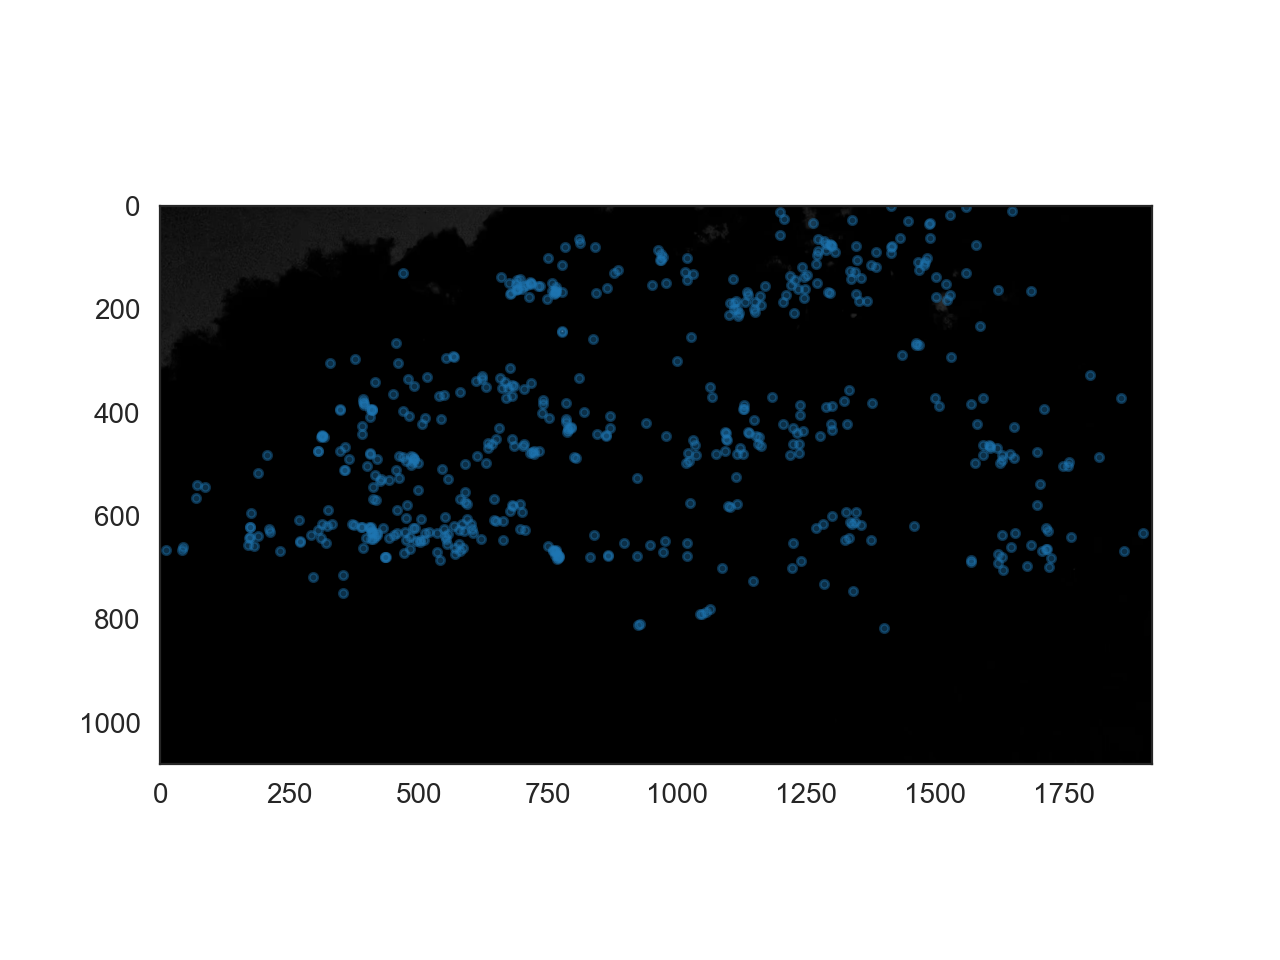

In [11]:
plt.figure()
plt.imshow(img, cmap ='gray')
plt.plot(df.x, df.y, '.', alpha=.4)

<IPython.core.display.Javascript object>


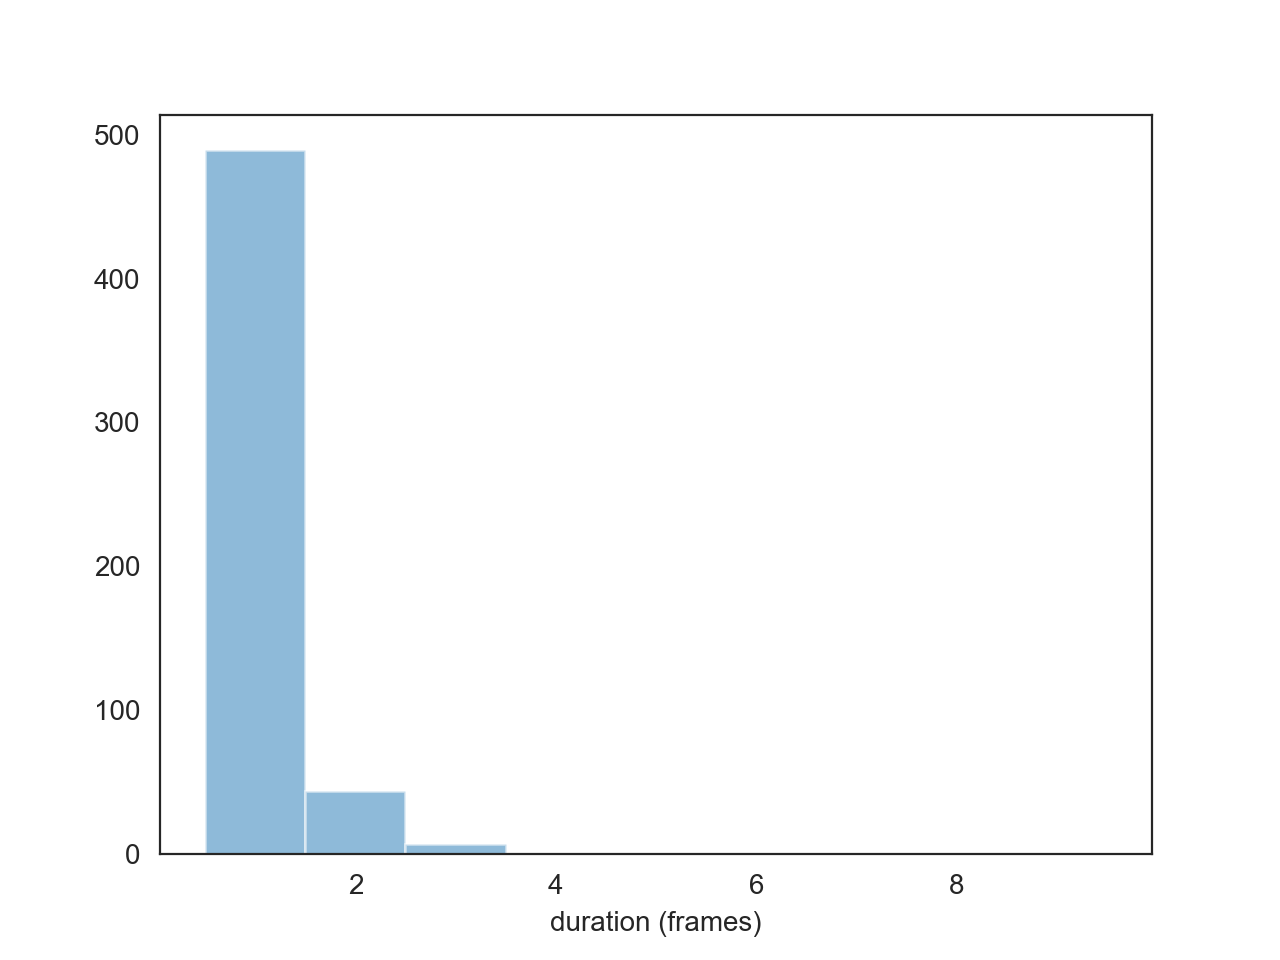

Text(0.5, 0, 'duration (frames)')

In [12]:
plt.figure()
plt.hist(df.duration, bins=.5+np.arange(10), alpha=.5)
plt.xlabel('duration (frames)')

<IPython.core.display.Javascript object>


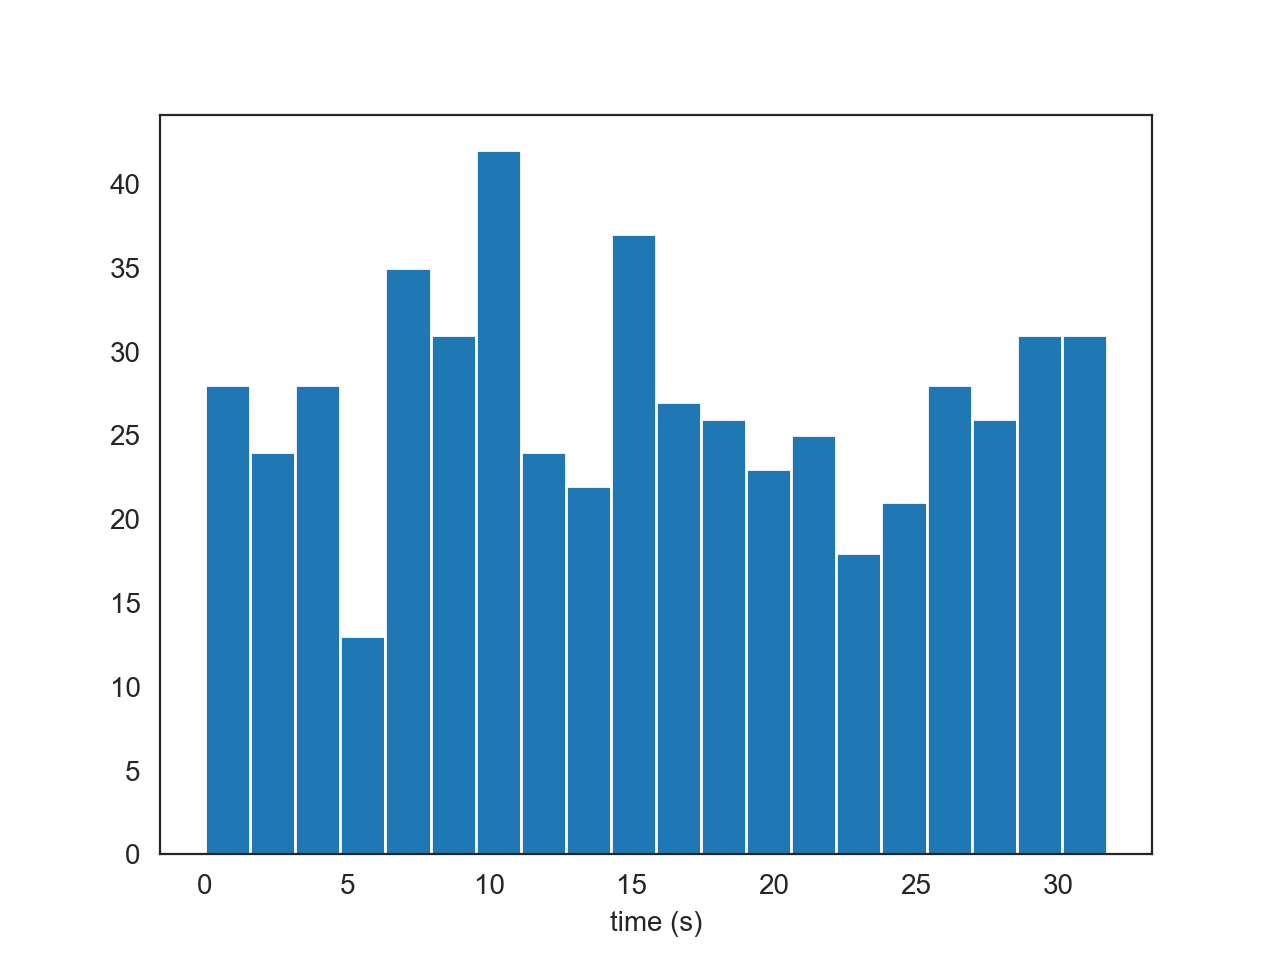

Text(0.5, 0, 'time (s)')

In [13]:
plt.figure()
plt.hist(df['time'], bins=20)
plt.xlabel('time (s)')

In [14]:
def closest_distances(df, max_distance=50):
    coords = df[['time', 'y', 'x']].values
    tree = KDTree(coords[:,1:])
    ii,jj = np.array(tuple(tree.query_pairs(max_distance))).T

    dist_spat = np.linalg.norm(coords[ii,1:]-coords[jj,1:], axis=-1)
    dist_time = np.linalg.norm(coords[ii,:1]-coords[jj,:1], axis=-1)
    return dist_spat, dist_time, ii, jj, coords

<IPython.core.display.Javascript object>


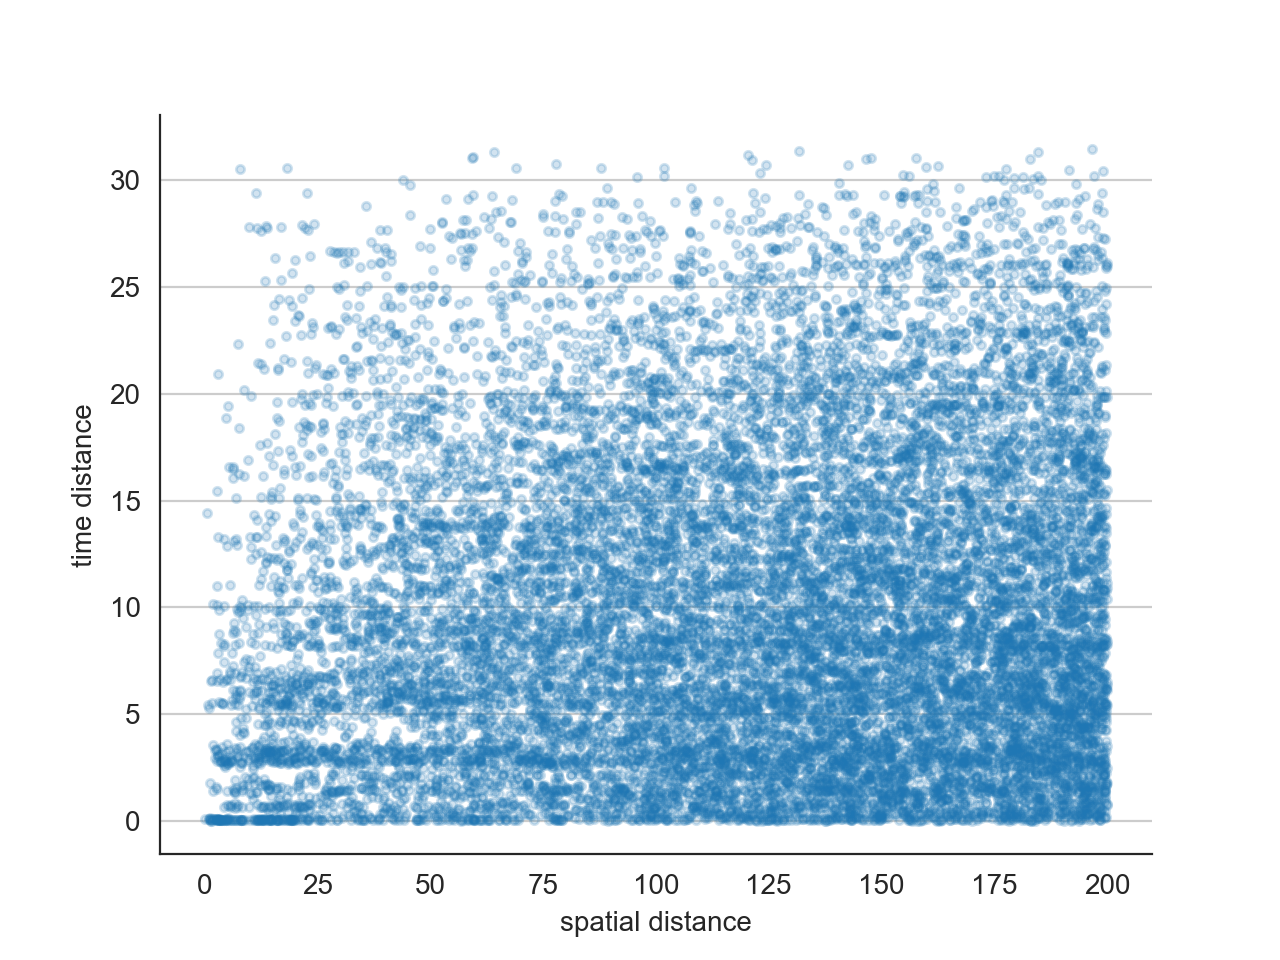

In [15]:
dx, dt, ii, jj, coords = closest_distances(df, max_distance=200)
plt.figure();
plt.plot(dx, dt, '.', alpha=.2)
#sns.kdeplot(x=dx, y=dt, shade=True, color='C0', alpha=.2)
plt.xlabel('spatial distance')
plt.ylabel('time distance')
sns.despine()
plt.grid(which='major', axis='y')
#plt.ylim(-10,500)

<IPython.core.display.Javascript object>


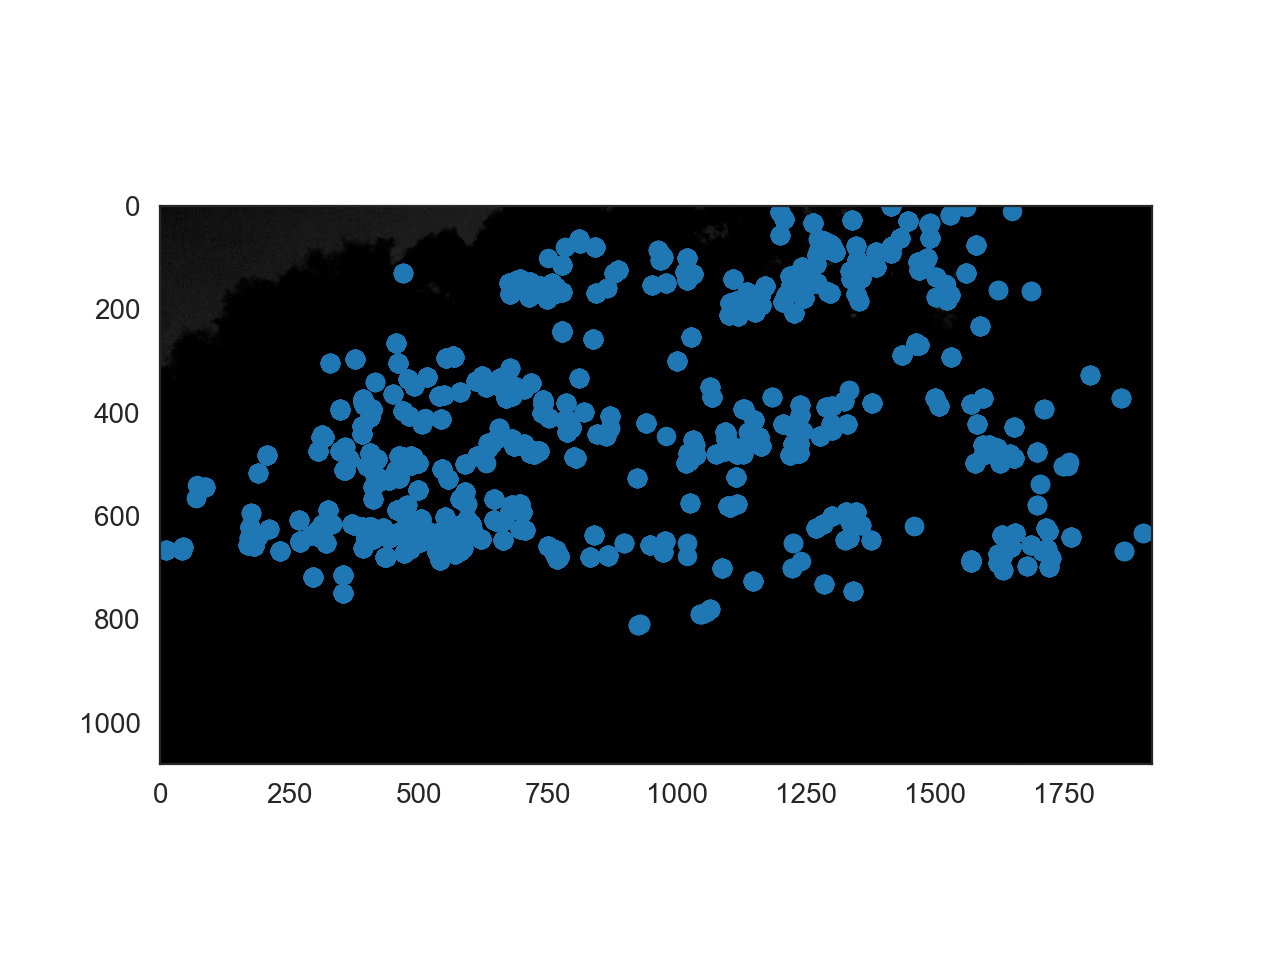

In [16]:
plt.figure()
plt.imshow(img, cmap ='gray')
plt.plot(*coords[ii,1:].T[::-1], 'o')

<IPython.core.display.Javascript object>


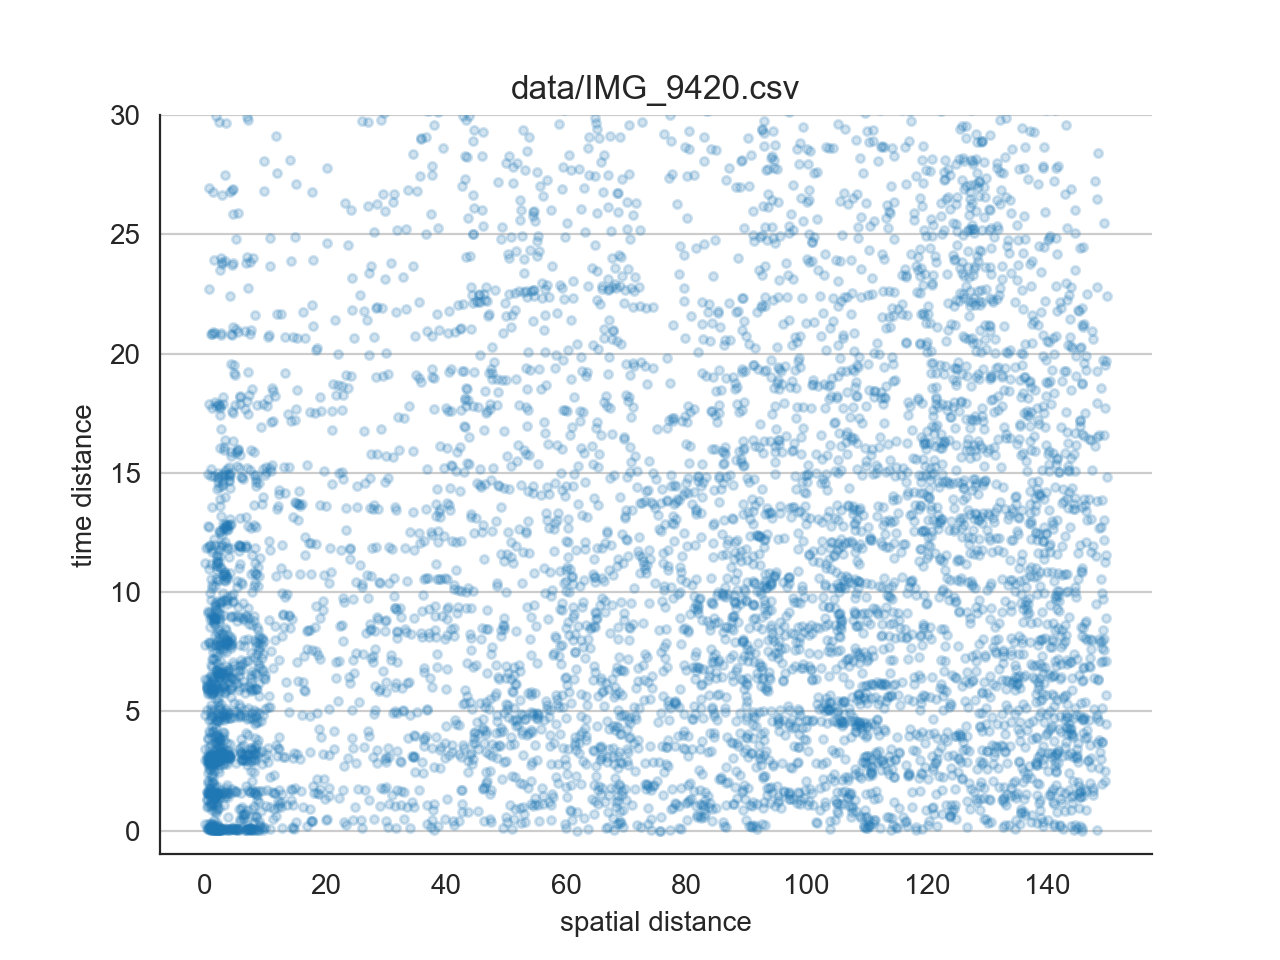

<IPython.core.display.Javascript object>


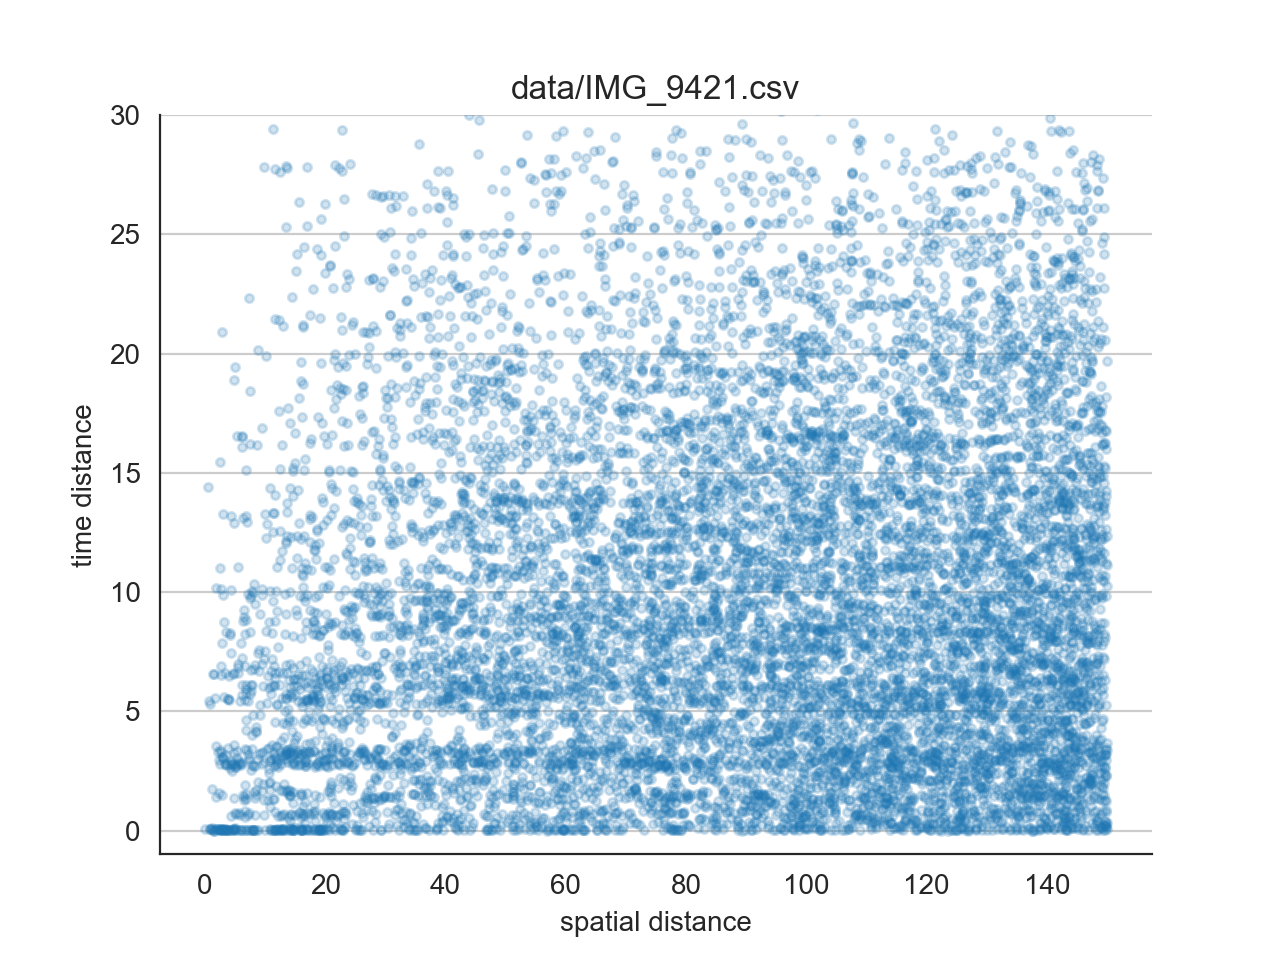

<IPython.core.display.Javascript object>


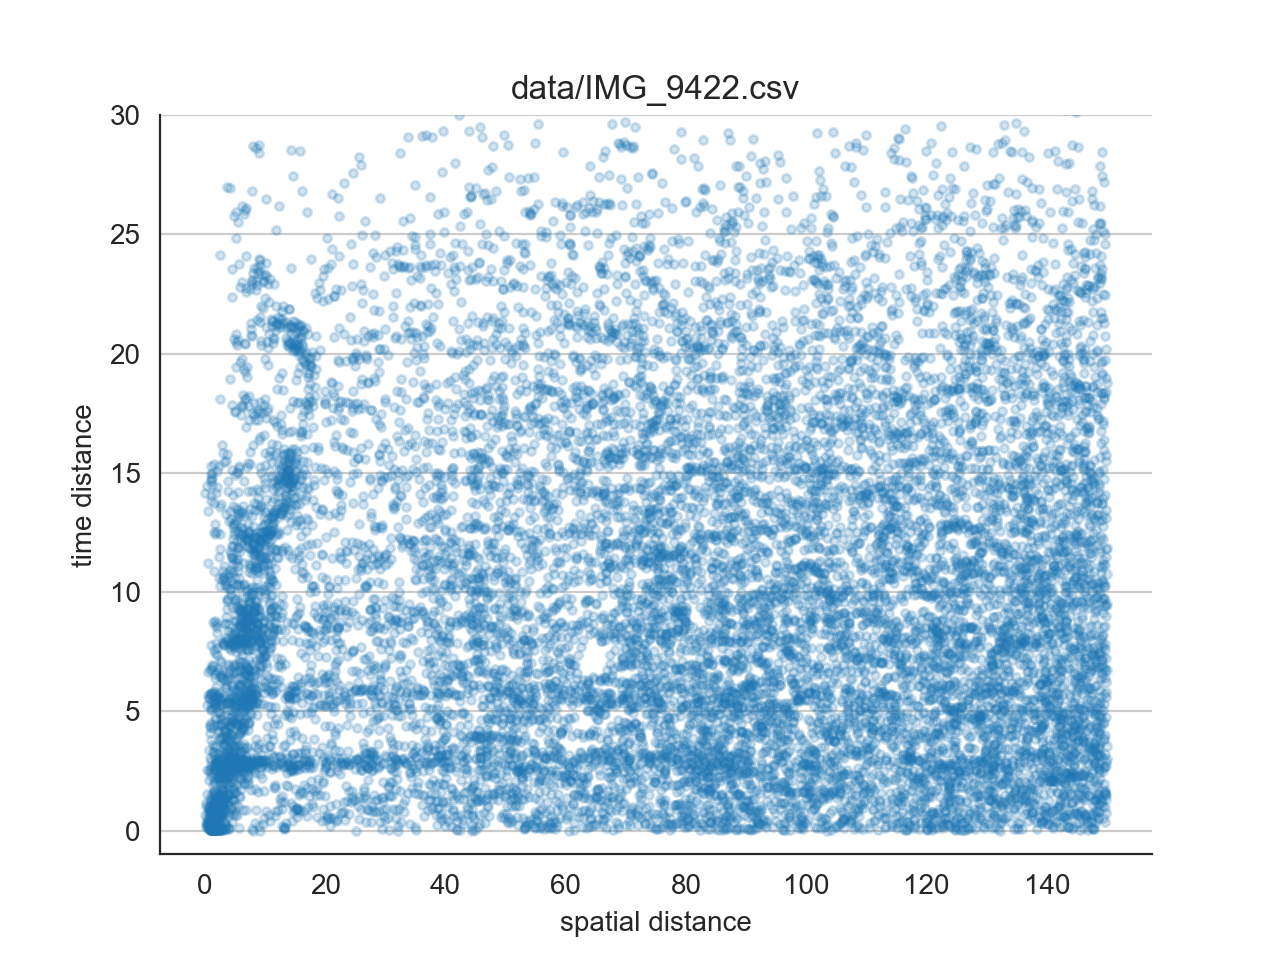

<IPython.core.display.Javascript object>


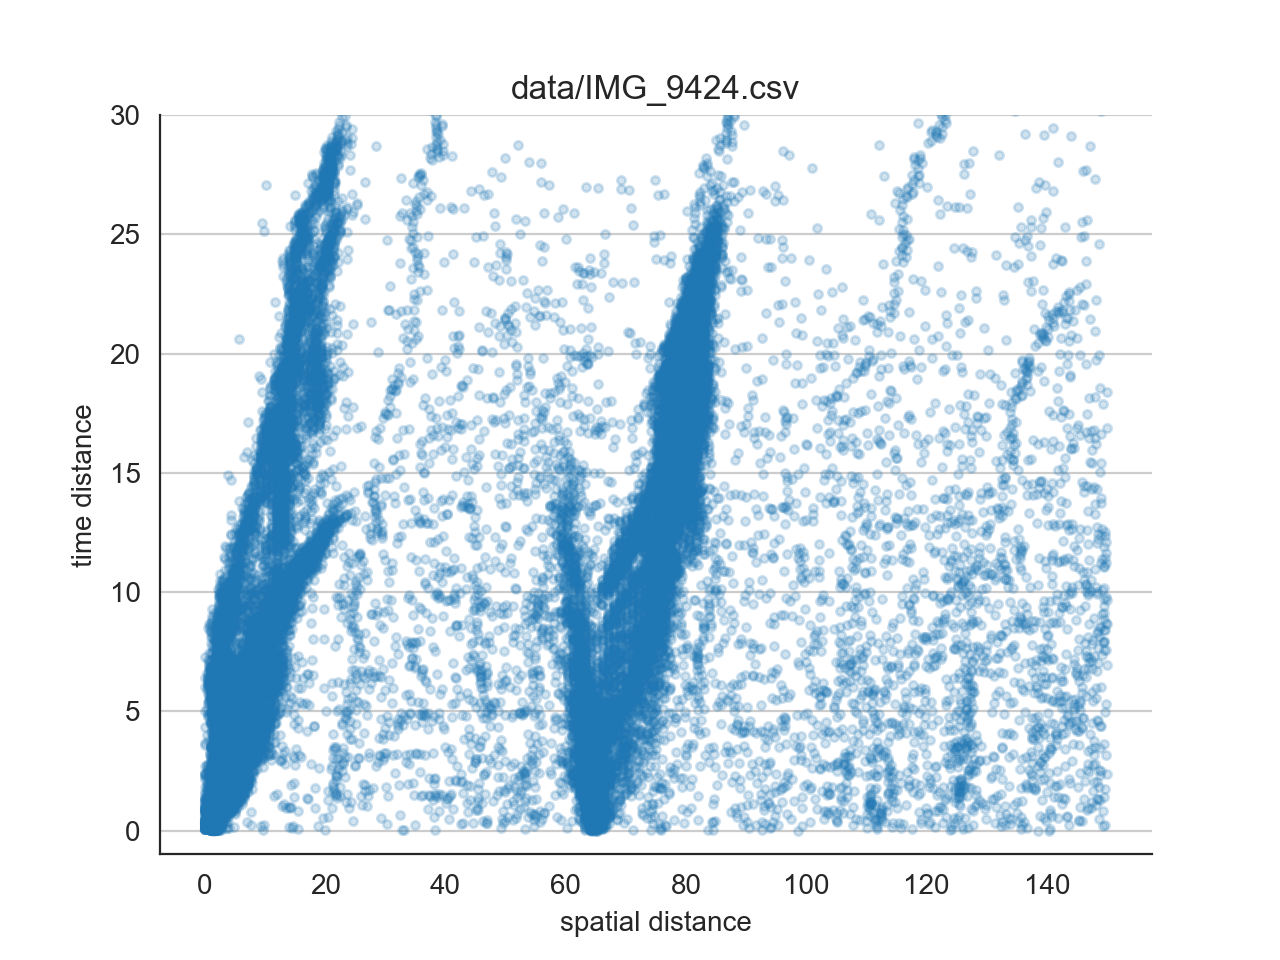

<IPython.core.display.Javascript object>


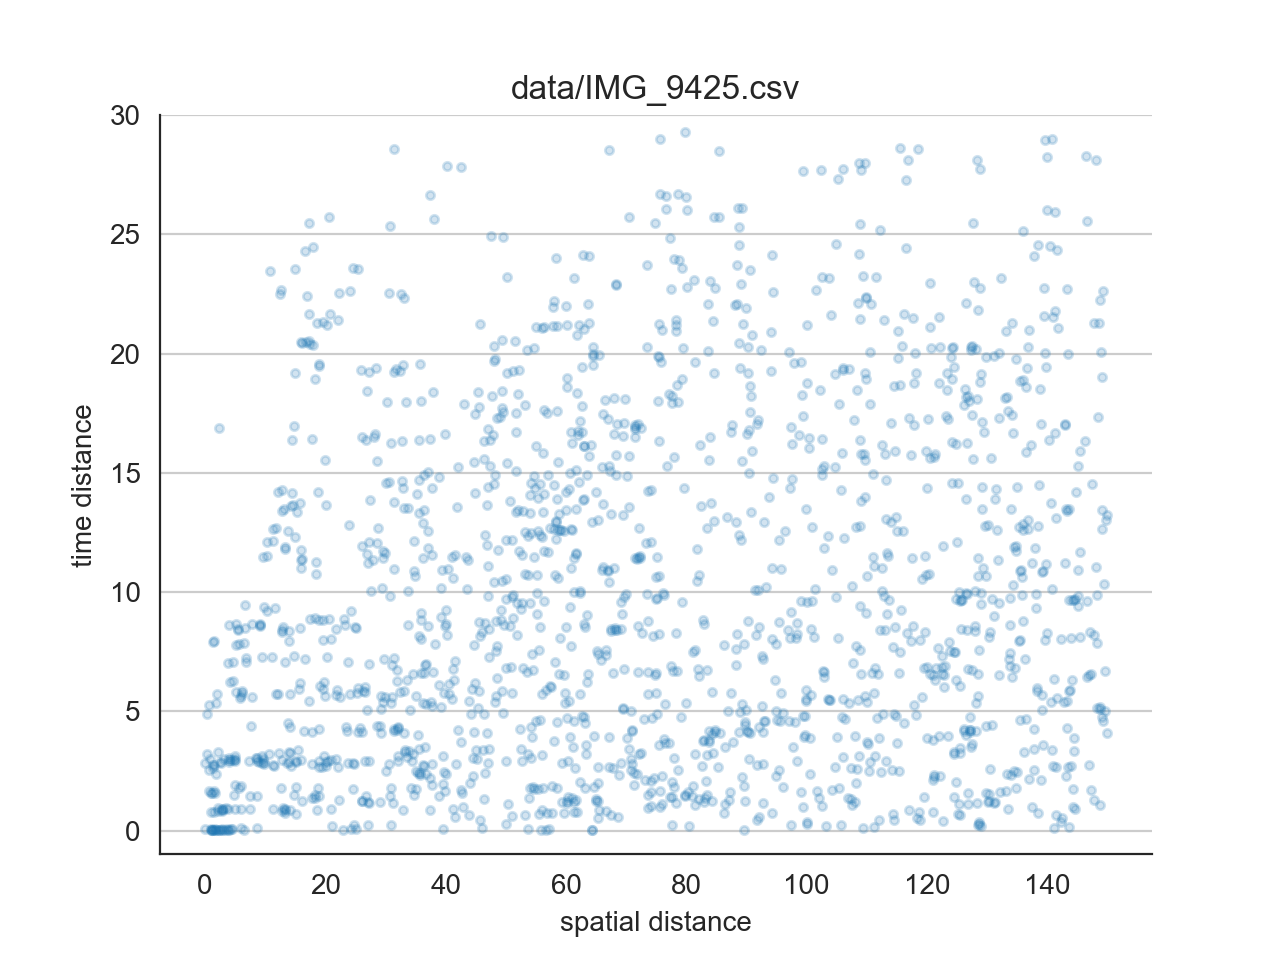

In [17]:
for i,_df in enumerate(dfs):
    dx, dt, ii, jj, coords = closest_distances(_df, max_distance=150)
    plt.figure();
    plt.plot(dx, dt, '.', alpha=.2)
    plt.xlabel('spatial distance')
    plt.ylabel('time distance')
    sns.despine()
    plt.title(fs[i])
    plt.grid(which='major', axis='y')
    plt.ylim(-1,30)

In [ ]:
plt.figure()
plt.hist(dt)

In [ ]:
np.sum(dx<10)

In [ ]:
dx.shape